# Máquinas Térmicas
 _Prof. Tito Dias Júnior_

### Ciclo de Rankine Simples Ideal


### **Exemplo:**
Considere uma usina de potência a vapor de água que opera segundo o ciclo de
Rankine simples ideal. O vapor entra na turbina a 3 MPa e 350 °C e é condensado no
condensador à pressão de 75 kPa. Determine a eficiência térmica desse ciclo.

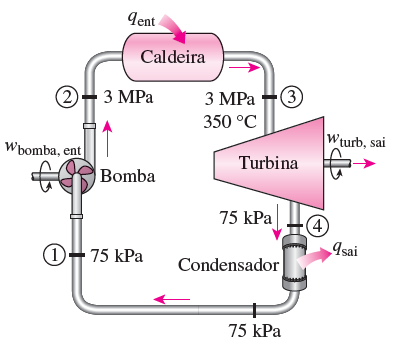

In [92]:
from IPython.display import Image
Image("Exemplo 10.1.png")

## Solução

Para a solução do problema devemos analisar o diagrama T-s para o ciclo ideal de Rankine e, partindo da definição, calcular a eficiência térmica do ciclo. Podemos construir o diagrama abaixo, desprezando as perdas de carga no evaporador e condensador, considerando a bomba e a turbina isentrópicas e o ciclo operando em regime permanente.

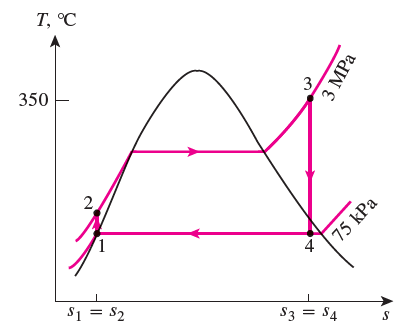

In [93]:
from IPython.display import Image
Image("Diagrama 10.1.png")

Começamos obtendo as propriedades do fluido de trabalho (Água) nos estados de interesse. Para isso vamos usar a biblioteca de propriedades de fluidos CoolProp (http://www.coolprop.org) e definir a água (water) como fluido de trabalho.

In [94]:
from CoolProp import CoolProp as cp
fluido = 'Water'

Para o estado 1, temos líquido saturado a $P_1=75kPa = 0,075MPa$:


In [95]:
P1 = 0.075 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
Q1 = 0    # Título igual a zero para líquido saturado
h1 = cp.PropsSI('H', 'P', P1 * 1E6, 'Q', Q1, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
v1 = 1/cp.PropsSI('D', 'P', P1 * 1E6, 'Q', Q1, fluido)  #Determinando a densidade e invertendo para obter o volume específico (m^3/kg)
s1 = cp.PropsSI('S', 'P', P1 * 1E6, 'Q', Q1, fluido) * 1E-3 #Determinando a entropia e convertendo para kJ/kg
T1 = cp.PropsSI('T', 'P', P1 * 1E6, 'Q', Q1, fluido)        #Determinando a temperatura em K
print('h1= {:.3f} kJ/kg'.format(h1))
print('v1= {:.3f} kJ/kg'.format(v1))
print('s1= {:.3f} kJ/kg'.format(s1))
print('T1= {:.3f} °C'.format(T1-273.15))

h1= 384.437 kJ/kg
v1= 0.001 kJ/kg
s1= 1.213 kJ/kg
T1= 91.758 °C


Para o estado 2, temos líquido comprimido a $P_2=3,0MPa$ e $s_2=s_1$ (bomba isentrópica):


In [96]:
P2 = 3 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
s2 = s1    # Título igual a um para vapor saturado
h2 = cp.PropsSI('H', 'P', P2 * 1E6, 'S', s2*1E3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
T2 = cp.PropsSI('T', 'P', P2 * 1E6, 'S', s2*1E3, fluido) #Determinando a temperatura em K
print('h2= {:.3f} kJ/kg'.format(h2))
print('T2= {:.3f} °C'.format(T2-273.15))

h2= 387.469 kJ/kg
T2= 91.943 °C


Do diagrama T-s, observamos que no estado 3 temos vapor superaquecido a $P_3=3,0MPa$ e $T_3=350°C$:


In [118]:
P3=P2 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
T3=350+273.15   # Temperatura em °C, a conversão para K será feita na chamada à função abaixo.
h3 = cp.PropsSI('H', 'P', P3 * 1E6, 'T', T3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
s3 = cp.PropsSI('S', 'P', P3 * 1E6, 'T', T3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
print('h3= {:.3f} kJ/kg'.format(h3))
print('T3= {:.3f} °C'.format(T3-273.15))

h3= 3116.063 kJ/kg
T3= 350.000 °C


E, no Estado 4 teremos $P_4 = 75kPa$ e $s_3=s_4$ e, para determinar a entalpia, precisamos antes calcular o título (Q4):


In [119]:
s4 = s3 #Turbina isentrópica
P4 = 0.075 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
Q4 = cp.PropsSI('Q', 'S', s4* 1E3, 'P', P4*1E6, fluido)
h4 = cp.PropsSI('H', 'Q', Q4, 'P', P4*1E6, fluido)*1e-3
T4 = cp.PropsSI('T', 'Q', 0, 'P', P4*1E6, fluido)  #Determinando a entalpia e convertendo para kJ/kg
print('h4= {:.3f} kJ/kg'.format(h4))
print('Q4= {:.3f} kJ/kg'.format(Q4))
print('s4= {:.3f} kJ/kg'.format(s4))
print('T4= {:.3f} °C'.format(T4-273.15))

h4= 2403.021 kJ/kg
Q4= 0.886 kJ/kg
s4= 6.745 kJ/kg
T4= 91.758 °C


Para continuar a solução do problema, devemos lembrar que a eficiÊncia do ciclo é dada pela relação entre o calor fornecido e o trabalho líquido. Da equação da energia para o ciclo, considerando ainda regime permanente ($\frac{dE_{vc}}{dt}=0$) e desprezando-se a variação de energias cinética e potencial, temos $Q_L+W_{bomb}=Q_H+W_{turb}$. E a eficiência $\eta=\frac{W_{turb}-W_{bomb}}{Q_H}$. Assim, para a caldeira ${W}=0$ e a equação da energia se reduz a: $Q_H=(h_2-h_1)$ por unidade de massa.

In [120]:
QH=(h3-h2)
print('QH = {:.3f} kJ/kg:'.format(QH))

QH = 2728.594 kJ/kg:


Aplicando a equação da energia para volume de controle para a bomba ${Q}=0$ obtemos: 
${W_{bomb}}=(h_2-h_1)$ por unidade de massa.

In [121]:
Wbomb=(h2-h1)
print('Wbomb = {:.3f} kJ/kg'.format(Wbomb))

Wbomb = 3.032 kJ/kg


Aplicando a equação da energia para volume de controle para a turbina $Q=0$ obtemos: 
$W_{turb}=(h_3-h_4)$

In [122]:
Wturb=(h3-h4)
print('Wturb = {:.3f} kJ/kg'.format(Wturb))

Wturb = 713.042 kJ/kg


Finalmente, obtemos eficiência térmica do ciclo: $\eta=\frac{W_{turb}-W_{bomb}}{Q_H}$:

In [123]:
e=(Wturb-Wbomb)/QH
print('e = {:.3f}'.format(e))

e = 0.260


## Diagrama T-s - Ciclo de Rankine

#### Processos termodinâmicos considerados:

- Processo 1 a 2 : Compressão isentrópica   (s2 = s1); <br> 
- Processo 2 a 3 : Aquecimento isobárico    (P3 = P2); <br>
- Processo 3 a 4 : Expansão isentrópica     (s4 = s3); <br>
- Processo 4 a 1 : Resfriamento isobárico   (P4 = P1).

Para plotar o Diagrama T-s, precisamos utilizar a biblioteca matplotlib para mostrar o gráfico e a biblioteca numpy para poder gerar os vetores que serão plotados.

Construindo o diagrama T - s:

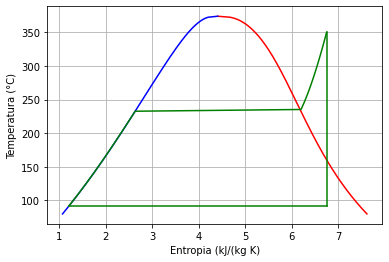

In [124]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure() # Define a saída do gráfico

## Curvas de saturação de líquido (Q=0) e vapor (Q=1) para temperatura variando entre 10°C e 647.096K (T crítica)
npt = np.linspace(80,647.096-273.15,200) # Gera um vetor com 200 elementos para o intervalo de temperatura 
svap = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 1, fluido) * 1E-3 for j in npt]]
sliq = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 0, fluido) * 1E-3 for j in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

### Conjunto de processos  (s,T)

T12 = [T1-273.15, T2-273.15] 
s12 = [s1, s2]

T23=np.linspace(T2-273.15,T3-273.15,100)
s23 = [s for s in [cp.PropsSI('S', 'T', j+273.15 , 'P', P3*1E6, fluido) * 1E-3 for j in T23]]

T34 = [T3-273.15, T4-273.15]
s34 = [s3, s4]

T41 = [T4-273.15, T1-273.15]
s41 = [s4,s1]

plt.plot(s12,T12,'g')
plt.plot(s23,T23,'g')
plt.plot(s34,T34,'g')
plt.plot(s41,T41,'g')


plt.xlabel('Entropia (kJ/(kg K)')
plt.ylabel('Temperatura (°C)')
plt.savefig('Rankine.png', transparent = True)
plt.grid()
plt.show()

In [125]:
from bokeh.plotting import *

# Criando um arquivo estático em html
output_file("Rankine.html")

output_notebook()

p = figure(plot_width=600, plot_height=600)

p.title.text = 'Ciclo Ideal de Rankine'
p.title.align = 'center'
p.title.text_color = 'black'
p.title.text_font_size = '30px'
p.xaxis[0].axis_label = 'Entropia (kJ/(kg K)'
p.yaxis[0].axis_label = 'Temperatura (°C)'


p.line(sliq, npt, legend_label = 'Curva de Líquido Saturado', line_width = 2, color = 'blue')
p.line(svap, npt, legend_label = 'Curva de Vapor Saturado', line_width = 2, color = 'red')


p.line(s12, T12, line_width = 2, color = 'green')
p.line(s23, T23, line_width = 2, color = 'green')
p.line(s34, T34, line_width = 2, color = 'green')
p.line(s41, T41, line_width = 2, color = 'green')
p.legend.location = "top_left"

# Exibir o Gráfico
show(p)

Loading BokehJS ...

### Exercício
Utilizando este Notebook, simule o mesmo ciclo com 450°C na entrada da turbina e registre o título na saída da turbina, a eficiência térmica do ciclo e o calor trocado na caldeira.

Determine a vazão mássica de vapor na caldeira, considerando que o combustível utilizado produz 10MJ de energia útil por quilograma a uma taxa de queima de 1kg/h. ($\dot{m}Q_H=\frac{10MJ}{kg}.\frac{1kg}{h} [MJ/h]$